<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [19]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [41]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


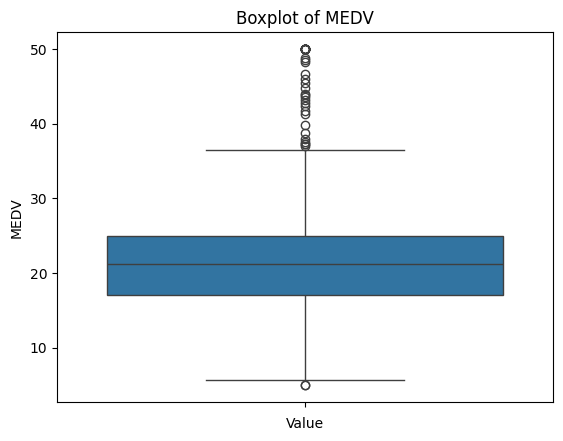

In [20]:
boxplot = sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV')
plt.xlabel('Value')
plt.ylabel('MEDV')
plt.show()

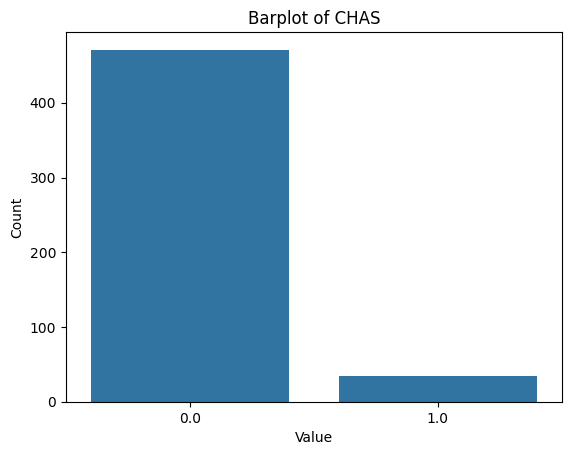

In [22]:
counts = boston_df['CHAS'].value_counts().reset_index()
counts.columns = ['value', 'count']

# 2. Barplot
sns.barplot(data=counts, x='value', y='count')
plt.title('Barplot of CHAS')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

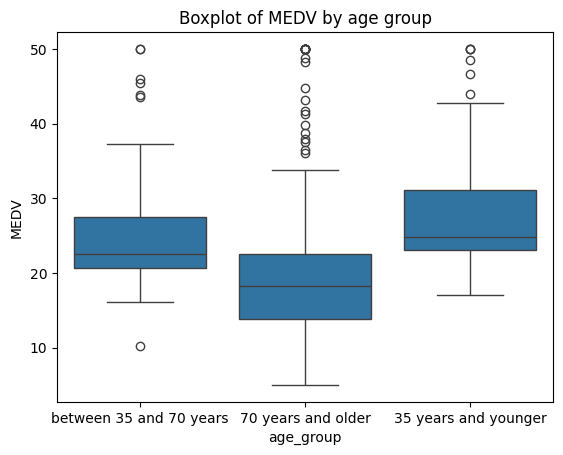

In [30]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
boxplot_2 = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Boxplot of MEDV by age group')
plt.show()

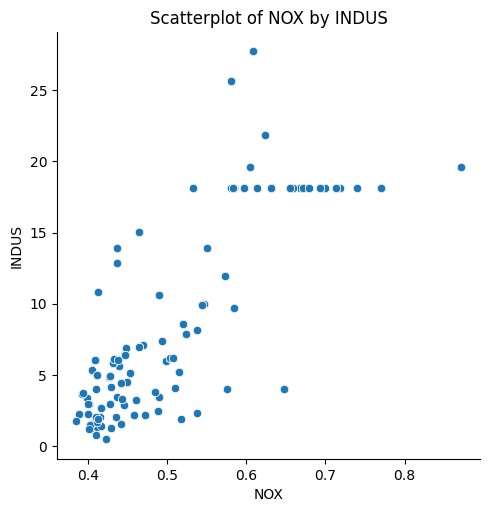

In [31]:
sns.relplot(x="NOX", y="INDUS",
            data=boston_df)
plt.title('Scatterplot of NOX by INDUS')
plt.show()
#They seem to present a level of linear correlation

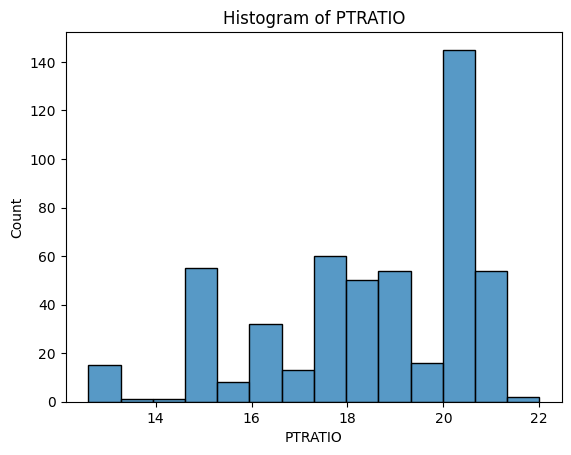

In [36]:
sns.histplot(x='PTRATIO', data=boston_df)
plt.title('Histogram of PTRATIO')
plt.show()

It has been assumed that the task was meant to test for differences in means rather than median values
*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in value of houses bounded by the Charles river or not")

α = 0.05

In [43]:
scipy.stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 1], boston_df['MEDV'][boston_df['CHAS'] == 0], equal_var = True)

#Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence the means differ.

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

It has been assumed that the task was meant to test for differences in means rather than median values
*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ

α = 0.05

In [45]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

#Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


*   $H\_0:$ Nitric oxide concentration is not correlated with proportion of non-retail business acres per town
*   $H\_1:$ Nitric oxide concentration is correlated with proportion of non-retail business acres per town

α = 0.05

In [48]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

#Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that the two are correlated

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [49]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 18 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        11:43:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Since the coefficient is 1.0916 for every additional unit increase in the weighted distance to the five Boston employment centers, the median value of owner-occupied homes decreases by $1091.6 dollars